### Loading the data

In [38]:
import pandas as pd
crop_data = pd.read_csv(r'C:\Users\91903\Documents\AV Case Challenges\Crop prediction\train_yaOffsB.csv')

### Understanding the data

In [39]:
crop_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000002,188,1,1,1,0,NaN,0,2,NaN
2,F00000003,209,1,0,1,0,0.0,0,2,1.0
3,F00000004,257,1,0,1,0,0.0,0,2,1.0
4,F00000005,257,1,1,1,0,0.0,0,2,1.0


In [40]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148168 entries, 0 to 148167
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       148168 non-null  object 
 1   Estimated_Insects_Count  148168 non-null  int64  
 2   Crop_Type                148168 non-null  int64  
 3   Soil_Type                148168 non-null  int64  
 4   Pesticide_Use_Category   148168 non-null  int64  
 5   Number_Doses_Week        148168 non-null  int64  
 6   Number_Weeks_Used        133275 non-null  float64
 7   Number_Weeks_Quit        148168 non-null  int64  
 8   Season                   148168 non-null  int64  
 9   Crop_Damage              88858 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 11.3+ MB


In [41]:
crop_data.describe(include="all")

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,148168,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,133275.000000,148168.000000,148168.000000,88858.000000
unique,148168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00153621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1398.212401,0.285453,0.457096,2.263802,25.850724,28.656485,9.565324,1.898527,0.190562
std,NaN,849.197419,0.451631,0.498158,0.461755,15.525407,12.403662,9.882540,0.701568,0.454215
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,NaN,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000


### Drop unwanted columns

In [42]:
crop_data.drop(columns=['ID'], inplace = True)

### Missing value treatment

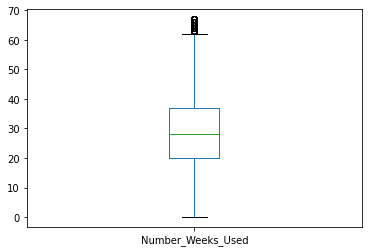

In [43]:
crop_data.Number_Weeks_Used.plot(kind="box")

In [44]:
# Fill missing values with mean column values
crop_data = crop_data.fillna(crop_data.mean())

### Treat for imbalance in dependent class

In [45]:
crop_data.groupby(['Crop_Damage']).count()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Crop_Damage,,,,,,,,
0.000000,74238,74238,74238,74238,74238,74238,74238,74238
0.190562,59310,59310,59310,59310,59310,59310,59310,59310
1.000000,12307,12307,12307,12307,12307,12307,12307,12307
2.000000,2313,2313,2313,2313,2313,2313,2313,2313


In [46]:
#over sampling. 

In [47]:
from sklearn.model_selection import train_test_split
y = crop_data.Crop_Damage
X = crop_data.drop('Crop_Damage', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)


In [48]:
from sklearn.utils import resample
df_smallest = X[X.Crop_Damage==2]
df_small = X[X.Crop_Damage==1]
df_major = X[X.Crop_Damage==0]

In [49]:
df_smallest_upsampled = resample(df_smallest, replace=True, n_samples=len(df_major), random_state=123)
df_small_upsampled = resample(df_small, replace=True, n_samples=len(df_major), random_state=123)

In [50]:
#under sampling

In [51]:
df_smallest_upsampled.shape

(55674, 9)

In [52]:
df_upsampled = pd.concat([df_major, df_smallest_upsampled, df_small_upsampled])

In [53]:
df_upsampled.Crop_Damage.value_counts()
crop_data = df_upsampled

### Remove outliers

In [54]:
print(crop_data.shape)

(167022, 9)


In [55]:
crop_data.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
48826,410,0,1,2,30,18.000000,10,2,0.0
69418,984,0,0,2,50,23.000000,14,1,0.0
67147,2840,0,1,2,40,15.000000,23,3,0.0
87282,488,0,1,2,20,28.656485,12,2,0.0
57072,2267,0,0,2,40,44.000000,5,1,0.0


In [56]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    lower_bound = df_in[col_name].min()
    upper_bound = q3+2.5*iqr
    print('Column',col_name,'IQR lower bound and upper bound are', lower_bound, 'and', upper_bound, 'respectively')
    df_out = df_in.loc[(df_in[col_name] > lower_bound) & (df_in[col_name] < upper_bound)]
    return df_out

In [57]:
crop_data['ID'] = crop_data1['ID']

In [58]:
crop_data_outlier_rem = remove_outlier(crop_data,"Estimated_Insects_Count")

Column Estimated_Insects_Count IQR lower bound and upper bound are 150 and 5196.5 respectively


In [59]:
crop_data_outlier_rem = remove_outlier(crop_data_outlier_rem,"Number_Weeks_Used")

Column Number_Weeks_Used IQR lower bound and upper bound are 0.0 and 84.5 respectively


In [60]:
crop_data_outlier_rem = remove_outlier(crop_data_outlier_rem,"Number_Weeks_Quit")

Column Number_Weeks_Quit IQR lower bound and upper bound are 0 and 45.5 respectively


In [61]:
crop_data_outlier_rem = remove_outlier(crop_data_outlier_rem,"Number_Doses_Week")

Column Number_Doses_Week IQR lower bound and upper bound are 5 and 90.0 respectively


In [62]:
crop_data_outlier_rem.shape

(81094, 10)

In [63]:
### Not removing Outliers as it unique values of Pesticide_Use_Category got reduced to just 1

### Encoding

In [64]:
crop_data_onehot = crop_data.copy()

crop_data_onehot = pd.get_dummies(crop_data_onehot, columns=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season' ], prefix=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season' ], drop_first=True)
crop_data_onehot.head()



,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,ID,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
48826,410,30,18.000000,10,0.0,F00051443,0,1,1,0,1,0
69418,984,50,23.000000,14,0.0,F00073083,0,0,1,0,0,0
67147,2840,40,15.000000,23,0.0,F00070694,0,1,1,0,0,1
87282,488,20,28.656485,12,0.0,F00091888,0,1,1,0,1,0
57072,2267,40,44.000000,5,0.0,F00060116,0,0,1,0,0,0


In [65]:
X_test_onehot = X_test.copy()

X_test_onehot = pd.get_dummies(X_test_onehot, columns=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season' ], prefix=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season' ], drop_first=True)
X_test_onehot.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
63844,789,20,43.0,0,0,0,0,1,1,0
102539,677,30,21.0,0,1,1,0,1,1,0
141085,790,30,16.0,21,0,0,1,0,1,0
109552,375,5,16.0,10,1,0,1,0,1,0
90296,283,30,10.0,11,0,0,1,0,1,0


In [66]:
crop_data_onehot.drop(['ID'],inplace=True, axis = 1)
crop_data_onehot.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
48826,410,30,18.000000,10,0.0,0,1,1,0,1,0
69418,984,50,23.000000,14,0.0,0,0,1,0,0,0
67147,2840,40,15.000000,23,0.0,0,1,1,0,0,1
87282,488,20,28.656485,12,0.0,0,1,1,0,1,0
57072,2267,40,44.000000,5,0.0,0,0,1,0,0,0


In [67]:
col = list(crop_data_onehot.columns)
col.remove('Crop_Damage')
print(col)

['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Crop_Type_1', 'Soil_Type_1', 'Pesticide_Use_Category_2', 'Pesticide_Use_Category_3', 'Season_2', 'Season_3']


### Standardization of data

In [68]:
temp

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,ID,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
48826,410,30,18.000000,10,F00051443,0,1,1,0,1,0
69418,984,50,23.000000,14,F00073083,0,0,1,0,0,0
67147,2840,40,15.000000,23,F00070694,0,1,1,0,0,1
87282,488,20,28.656485,12,F00091888,0,1,1,0,1,0
57072,2267,40,44.000000,5,F00060116,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
81100,2015,20,48.000000,0,F00085369,0,1,0,1,1,0
74396,3516,30,30.000000,19,F00078307,0,0,1,0,1,0
35183,625,50,18.000000,15,F00037066,0,0,1,0,1,0
40157,2139,20,28.000000,18,F00042279,0,0,1,0,0,0


In [69]:
temp = crop_data_onehot.drop(['Crop_Damage'], axis =1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(temp)
data1 = scaler.transform(temp)
data = pd.DataFrame(data1)
data.columns = col
data.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,-1.369134,0.292744,-1.104997,0.313928,-0.623247,1.128573,0.960797,-0.887572,0.982985,-0.491327
1,-0.722083,1.608905,-0.730205,0.735147,-0.623247,-0.886075,0.960797,-0.887572,-1.017309,-0.491327
2,1.370127,0.950825,-1.329871,1.682890,-0.623247,1.128573,0.960797,-0.887572,-1.017309,2.035304
3,-1.281208,-0.365336,-0.306205,0.524537,-0.623247,1.128573,0.960797,-0.887572,0.982985,-0.491327
4,0.724202,0.950825,0.843918,-0.212596,-0.623247,-0.886075,0.960797,-0.887572,-1.017309,-0.491327


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_test_onehot)
data1 = scaler.transform(X_test_onehot)
data_test = pd.DataFrame(data1)
data_test.columns = col
data_test.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,-0.723739,-0.377704,1.217165,-0.970493,-0.633358,-0.923895,-1.606876,1.645572,1.005577,-0.501037
1,-0.855410,0.264051,-0.654409,-0.970493,1.578886,1.082374,-1.606876,1.645572,1.005577,-0.501037
2,-0.722563,0.264051,-1.079767,1.153956,-0.633358,-0.923895,0.622325,-0.607691,1.005577,-0.501037
3,-1.210450,-1.340337,-1.079767,0.041149,1.578886,-0.923895,0.622325,-0.607691,1.005577,-0.501037
4,-1.318608,0.264051,-1.590197,0.142313,-0.633358,-0.923895,0.622325,-0.607691,1.005577,-0.501037


### Splitting test and train

In [71]:
X = data
#X = crop_data_onehot.drop(['Crop_Damage'], axis =1)
X.head()
y = crop_data_onehot.Crop_Damage
y = pd.DataFrame(y)
y.columns = ["Crop_Damage"]
y.head()

,Crop_Damage
48826,0.0
69418,0.0
67147,0.0
87282,0.0
57072,0.0


In [72]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(111126, 8) (111126,) (37042, 8) (37042,)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 22)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(125266, 10) (125266, 1) (41756, 10) (41756, 1)


In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\91903\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [75]:
y_pred_train = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [76]:
X_train.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
12921,-0.799864,-0.365336,-1.854579,1.682890,1.604500,-0.886075,0.960797,-0.887572,-1.017309,2.035304
112641,0.876384,2.266985,1.668459,-0.739120,-0.623247,-0.886075,-1.040803,1.126669,0.982985,-0.491327
32181,-1.369134,-0.365336,-0.805163,-0.739120,1.604500,-0.886075,0.960797,-0.887572,0.982985,-0.491327
72558,-1.068154,-0.694376,0.319210,-0.739120,1.604500,1.128573,-1.040803,1.126669,0.982985,-0.491327
41962,-1.007281,2.266985,0.319210,-0.633815,-0.623247,1.128573,0.960797,-0.887572,-1.017309,-0.491327


In [77]:
#With Std scalar

In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_test_pred))

Accuracy score for train data is: 0.5375281401178292
Accuracy score for test data is: 0.5343902672669796


In [79]:
#Without standardscalar

In [80]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_test_pred))

Accuracy score for train data is: 0.5375281401178292
Accuracy score for test data is: 0.5343902672669796


In [81]:
#With over sampling minority

In [82]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_test_pred))

Accuracy score for train data is: 0.5375281401178292
Accuracy score for test data is: 0.5343902672669796


In [83]:
#With over sampling minority bifurcating test train before oversampling

In [84]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_test_pred))

Accuracy score for train data is: 0.5375281401178292
Accuracy score for test data is: 0.5343902672669796


In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_matrix.index = ['Actual Class0','Actual Class1', 'Actual Class2']
confusion_matrix.columns = ['Predicted Class0','Predicted Class1', 'Predicted Class2']
print(confusion_matrix)

               Predicted Class0  Predicted Class1  Predicted Class2
Actual Class0              9732              1921              2280
Actual Class1              4153              3263              6540
Actual Class2              2582              1966              9319


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_matrix.index = ['Actual Class0','Actual Class1', 'Actual Class2']
confusion_matrix.columns = ['Predicted Class0','Predicted Class1', 'Predicted Class2']
print(confusion_matrix)

               Predicted Class0  Predicted Class1  Predicted Class2
Actual Class0              9732              1921              2280
Actual Class1              4153              3263              6540
Actual Class2              2582              1966              9319


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_matrix.index = ['Actual Class0','Actual Class1', 'Actual Class2']
confusion_matrix.columns = ['Predicted Class0','Predicted Class1', 'Predicted Class2']
print(confusion_matrix)

               Predicted Class0  Predicted Class1  Predicted Class2
Actual Class0              9732              1921              2280
Actual Class1              4153              3263              6540
Actual Class2              2582              1966              9319


### Predicting on purely test data set

In [88]:
crop_data_test = pd.read_csv(r'C:\Users\91903\Documents\AV Case Challenges\Crop prediction\test_pFkWwen.csv')

In [89]:
crop_data_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [90]:
crop_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [91]:
#Drop id as it isnt required for prediction
crop_data_test.drop(columns=['ID'], inplace = True)
# Fill missing values with mean column values
crop_data_test = crop_data_test.fillna(crop_data_test.mean())

In [92]:
crop_data_test_onehot = crop_data_test.copy()

crop_data_test_onehot = pd.get_dummies(crop_data_test_onehot, columns=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season' ], prefix=['Crop_Type','Soil_Type','Pesticide_Use_Category','Season' ], drop_first=True)
crop_data_test_onehot.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,188,0,28.705094,0,1,1,0,0,1,0
1,410,0,0.000000,0,1,1,0,0,1,0
2,626,0,0.000000,0,1,0,0,0,1,0
3,731,0,0.000000,0,1,0,0,0,1,0
4,789,0,0.000000,0,0,0,0,0,0,0


In [93]:
col = list(crop_data_test_onehot.columns)
print(col)

['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Crop_Type_1', 'Soil_Type_1', 'Pesticide_Use_Category_2', 'Pesticide_Use_Category_3', 'Season_2', 'Season_3']


In [94]:
scaler = StandardScaler().fit(crop_data_test_onehot)
data1 = scaler.transform(crop_data_test_onehot)
data = pd.DataFrame(data1)
data.columns = col
data.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,-1.423343,-1.669821,-3.013870e-16,-0.966832,1.575911,1.094183,-1.593753,-0.612569,1.005071,-0.502659
1,-1.161988,-1.669821,-2.435136e+00,-0.966832,1.575911,1.094183,-1.593753,-0.612569,1.005071,-0.502659
2,-0.907696,-1.669821,-2.435136e+00,-0.966832,1.575911,-0.913924,-1.593753,-0.612569,1.005071,-0.502659
3,-0.784082,-1.669821,-2.435136e+00,-0.966832,1.575911,-0.913924,-1.593753,-0.612569,1.005071,-0.502659
4,-0.715800,-1.669821,-2.435136e+00,-0.966832,-0.634554,-0.913924,-1.593753,-0.612569,-0.994955,-0.502659


In [99]:
y_predicted_test_final = logreg.predict(data)
print(y_predicted_test_final)
final_pred = pd.DataFrame(y_predicted_test_final)
final_pred.columns = ['Crop_Damage']
crop_data_test = pd.read_csv(r'C:\Users\91903\Documents\AV Case Challenges\Crop prediction\test_pFkWwen.csv')
final_pred['ID'] = crop_data_test['ID']

[2. 2. 2. ... 1. 1. 1.]


In [100]:
#final_pred = final_pred[["ID", "Crop_Damage"]]
final_pred.to_csv(r'C:\Users\91903\Documents\AV Case Challenges\Crop prediction\results.csv')